In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import os
import matplotlib.ticker as ticker
import copy

D:\conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def open_file():
    path='C:\\Users\\zyx\\Desktop\\spectrum\\1arcsec'  #设置存储路径
    files= os.listdir(path) #得到文件夹下的所有文件名称
    data=[]  # 建立空列表储存数据
    data_i=0 # 记录是第几个文件
    for file in files:  #按照顺序在 files 里面进行每一个文件的 数据名称 循环读取
        position = path+"\\"+file   # 打开第一个文件
        data.append([])
        with open(position, 'r') as f:
            line_num=0
            for line in f:
                if line_num>0:
                    data[data_i].append(line.strip().split())
                line_num+=1
        data_i+=1
    return data  

In [3]:
def data_to_xy(data):   # 输入某一个文件的数据，转换成xy
    data_x=[]
    data_y=[]
    for i in range(len(data)):
        data_x.append(float(data[i][0]))
        data_y.append(float(data[i][1]))
    return data_x,data_y

In [4]:
def paint(x,y):    # 把光谱画出来
    plt.plot(x,y)
    plt.xlabel("frequency (GHz)")
    plt.ylabel("flux (Jy/beam)")
    #plt.autoscale(enable=True, axis='y', tight=True)
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.show()

In [5]:
def hebin(list_x,list_y):    # 把列表每三个数据合成一个
    list_x_new=[]
    list_y_new=[]
    for i in range(int(len(list_x)/3)):
        x0=list_x[3*i]
        x1=list_x[3*i+1]
        x2=list_x[3*i+2]
        y0=list_y[3*i]
        y1=list_y[3*i+1]
        y2=list_y[3*i+2]
        list_x_new.append((x0+x1+x2)/3)
        list_y_new.append((y0+y1+y2)/3)
    return list_x_new,list_y_new

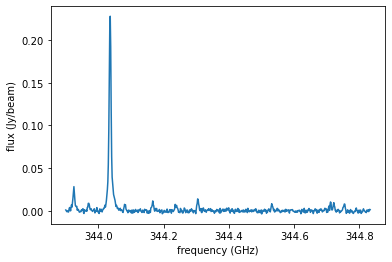

638


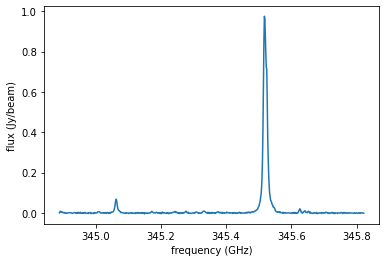

638


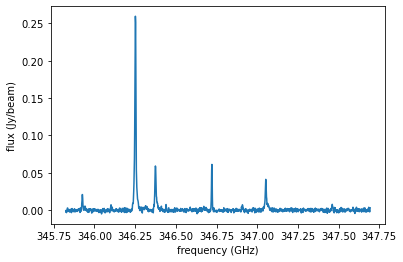

1278


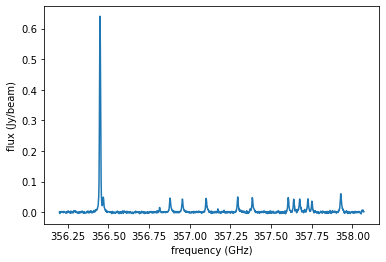

1278


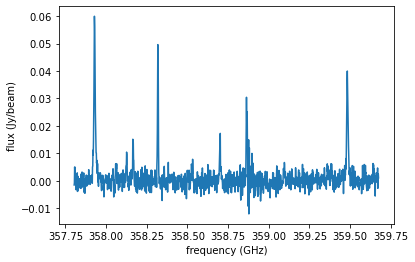

1278


In [6]:
data=open_file()
for i in range(len(data)):
    x,y=data_to_xy(data[i])
    x1,y1=hebin(x,y)
    paint(x1,y1)
    print(len(x1))

In [7]:
def find_peak2(x,y):
    m=max(y)
    index_m=y.index(m)
    return m,index_m

In [8]:
# 放大谱线
def enlarge(x,y):
    m,index_m=find_peak2(x,y)
    data_x=x[index_m-80:index_m+80]
    data_y=y[index_m-80:index_m+80]
    return data_x,data_y

def enlarge2(peak_list,x,y):
    large_peak_list_x=[]    #放大后的谱线
    large_peak_list_y=[]
    data_x=np.array(x)
    data_x_real=data_x/(1-(239.5*10e3/(3.0*10e8)))   # 把频率的红移/蓝移移回来
    data_x_real=[float('{:.8f}'.format(j)) for j in data_x_real]

    for i in range(len(peak_list)):
        index_m=data_x_real.index(peak_list[i])
        #print(index_m)
        data_x=data_x_real[index_m-30:index_m+30]
        #print(data_x)
        data_y=y[index_m-30:index_m+30]
        #print(data_y)
        large_peak_list_x.append(data_x)
        large_peak_list_y.append(data_y)
        
        #paint(data_x,data_y)
    return large_peak_list_x,large_peak_list_y

In [9]:
# # 删掉识别不出的线和太密集的线
# # 对齐速度
# c=299792458

# # name=['SO','CO','SO','HCO+','SO2']
# # rest_fre=[344.31061200,345.79598990,346.52848100,356.73422300,358.21564000]

# name_spw0=["HC15N","34SO2","SO","CH3OCH3","CH3OH","CH3OCH3","34SO2","34SO2","t-HCOOH"]
# name_spw1=["SO2","CO"]
# name_spw2=["CH3OH","SO","SO2","t-HCOOH","H13CO+","SiO","SO+"]
# name_spw3=["HCO+","SO2","34SO2","SO2","SO2","SO2","CH3OCH3","SO2","SO2","SO2","SO2","SO2","SO2","SO2","SO2"]
# name_spw4=["CH3OCH3","CH3OH","34SO2","SO2"]
# name=[name_spw0,name_spw1,name_spw2,name_spw3,name_spw4]

# spw0_peak=[344.19997631,344.24591399,344.31042249,344.35733694,344.44188244,344.51030006,344.57969546,344.80596309,345.03076456]
# rest_fre0=[344.2003199, 344.2453476, 344.310612, 344.3580659, 344.443433, 344.5153801, 344.581045, 344.8079157,345.030561]

# spw1_peak=[345.33849123,345.79395884]
# rest_fre1=[345.3385391,345.7959899]

# spw2_peak=[346.20164832,346.52858732,346.65173964,346.71624814,346.99822725,347.33054255]
# rest_fre2=[346.202719,346.528481,346.6521672, 346.718858,  346.998344,347.330631]

# spw3_peak=[356.73359532,356.75998539,357.10011993,357.16462743,357.2403759,357.38649655,357.45784651,357.58099883,357.67043123,357.89132257,357.92504249,357.96120636,358.01300872,358.03939879,358.21484185]
# rest_fre3=[356.734223, 356.7551893, 357.1021822, 357.16536, 357.24119, 357.38757, 357.4602017, 357.5814483, 357.67178, 357.892442, 357.92596, 357.96289, 358.01309, 358.03808,358.21564]

# spw4_peak=[358.45089029,358.6043418,358.98845945,359.76988829]
# rest_fre4=[358.4519426, 358.605799, 358.9879745,359.7706815]

# peak=[spw0_peak,spw1_peak,spw2_peak,spw3_peak,spw4_peak]
# rest_fre=[rest_fre0,rest_fre1,rest_fre2,rest_fre3,rest_fre4]

# x=[]
# y=[]
# plt.figure(figsize=(20,12))
# for i in range(len(data)):
#     data_x,data_y=data_to_xy(data[i])   # 一个spw文件的所有x,y数据
#     #for n in range(len(name)):    # 循环每一个spw
#     x_large,y_large=enlarge2(peak[i],data_x,data_y)      # 一个光谱文件中，把所有的谱线挑出来，放在一个列表里 x_large=[[x,x,x,x],[x,x,x,x,x]]

#     for j in range(len(x_large)):    # 循环一个spw的每一个峰
#         list_x=[]
#         list_y=[]

#         for k in range(len(x_large[j])):            # 把某一个峰的列表数据取出来 peak1=x_large[i]=[x,x,x,x,x,x]
#             list_x.append((c*(x_large[j][k]-rest_fre[i][j])/rest_fre[i][j])/1000)
#             #list_x.append((c*(x_large[k]-rest_fre[j])/rest_fre[j])/1000+239.5)   # 将频率转换为速度，并加上视向速度
#             list_y.append(y_large[j][k])

#         plt.plot(list_x,list_y,label=name[i][j])
#         #plt.title(name[i])
#         plt.xlabel("velocities (km/s)")
#         plt.ylabel("flux (Jy/beam)")
#         #plt.legend()
#         #print(name[i])
#         #plt.xlim(-1,1)
#         print("频率起始值：",list_x[0])
#         print("频率结束值：",list_x[-1])
#         print("频率步长：",list_x[1]-list_x[0])
#         print(len(list_x))
#         print("------------------------------------") 
#         x.append(list_x)
#         y.append(list_y)
        

# plt.legend()
# plt.show()

In [10]:
def duiqi_v(list_x,list_y):
    delta_x=0.4262   # 频率步长
    x_start=-30 
    x_finish=30
    num=int((x_finish-x_start)/delta_x)+1  # 对齐之后数据长度
    y_flux=[]   # 对齐横坐标之后，只需要记录纵坐标。这是纵坐标。
    find_x=[]
    find_y=[]
    find_x=copy.deepcopy(list_x)
    find_y=copy.deepcopy(list_y)

    for i in range(num):
        a=x_start+i*delta_x
        b=x_start+(i+1)*delta_x

    # 找原横坐标对应区间(比如新x轴在【-26.4，-26】区间内的数据，就要找到原来x轴位于该区间的数据)
        if len(find_x)>=3:        # 原来x轴的数据还剩下3个以上
            data1_x=find_x[0]
            data2_x=find_x[1]
            data3_x=find_x[2]
            #print(data1_x)
            if data1_x>=a and data1_x<=b and data2_x>=b:
                y_flux.append(find_y[0])
                find_x.remove(data1_x)   # 把已经找到的数据删掉
                find_y.remove(find_y[0])
                #print("进入了第一种情况")
                continue
            elif data1_x>b:
                y_flux.append(0)
#                 print("有0")
#                 print(n)
#                 print(data1_x,data2_x,data3_x)
#                 print(a,b)
                continue
            elif data1_x>=a and data2_x<=b and data3_x>b:
                y_flux.append((find_y[0]+find_y[1])/2)
                find_x.remove(data1_x)
                find_x.remove(data2_x)
                find_y.remove(find_y[0])
                find_y.remove(find_y[0])
                #print("进入了第三种情况")
                continue

        elif len(find_x)==2:         # 原来x轴的数据还剩下2个
            #print("还有2个数据！")
            data1_x=find_x[0]
            data2_x=find_x[1]
            if data1_x>=a and data1_x<=b and data2_x>=b:
                y_flux.append(find_y[0])
                find_x.remove(data1_x)   # 把已经找到的数据删掉
                find_y.remove(find_y[0])
                #print("进入了第一种情况")
                continue
            elif data1_x>b:
                y_flux.append(0)

                continue
            elif data1_x>=a and data2_x<=b:
                y_flux.append((find_y[0]+find_y[1])/2)
                find_x.remove(data1_x)
                find_x.remove(data2_x)
                find_y.remove(find_y[0])
                find_y.remove(find_y[0])
                #print("进入了第三种情况")
                continue

        elif len(find_x)==1:       # 原来x轴的数据还剩下1个
            #print("还有1个数据！")
            y_flux.append(find_y[0])
            find_x.remove(find_x[0])   # 把已经找到的数据删掉
            find_y.remove(find_y[0])
            continue

        elif len(find_x)==0:
            #print("没有数据了！")
            y_flux.append(0)
        

    #print(y_flux)
    #plt.plot(y_flux)
    return y_flux

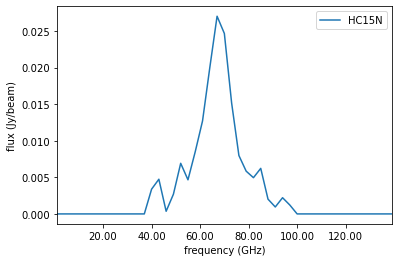

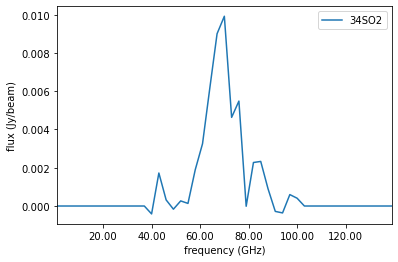

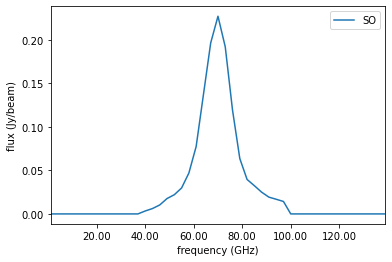

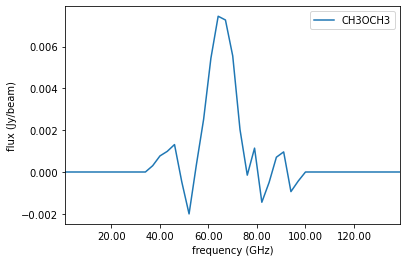

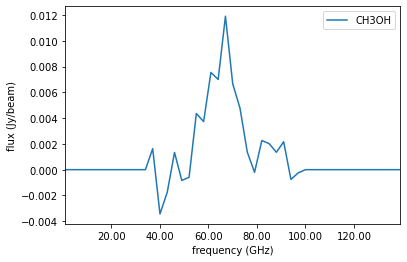

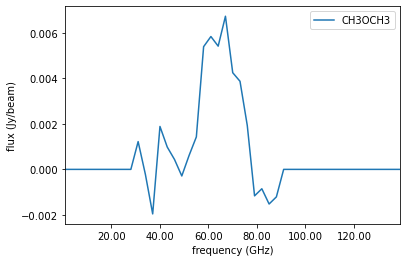

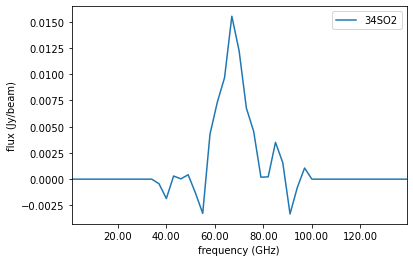

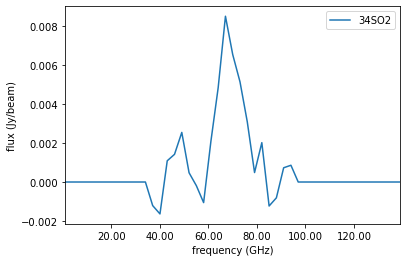

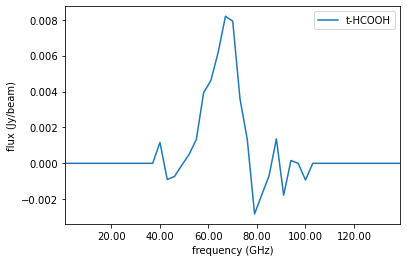

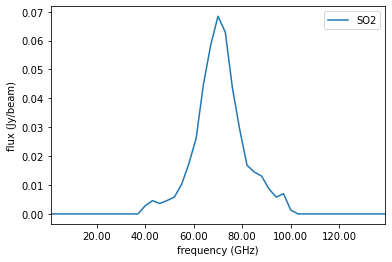

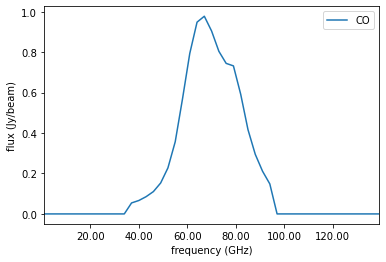

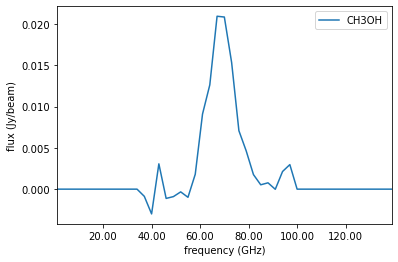

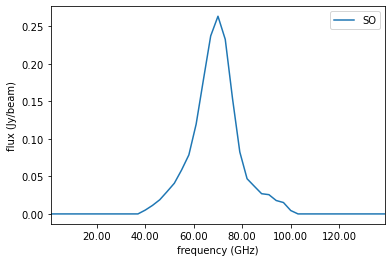

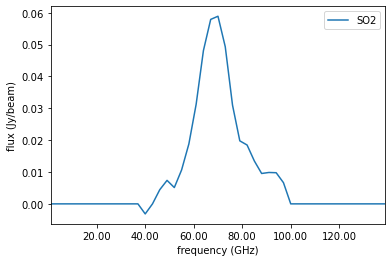

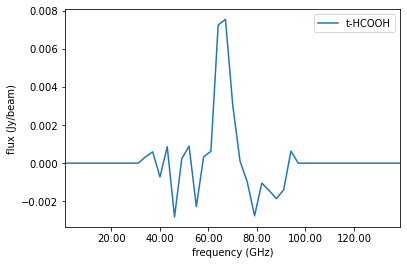

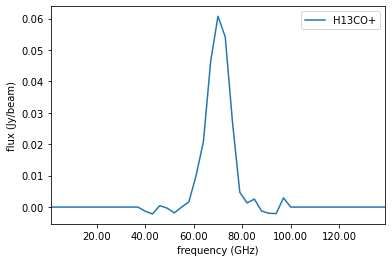

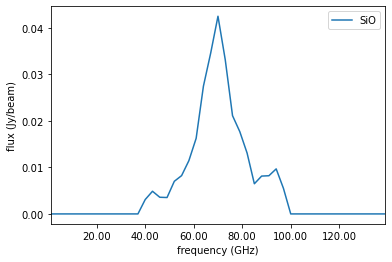

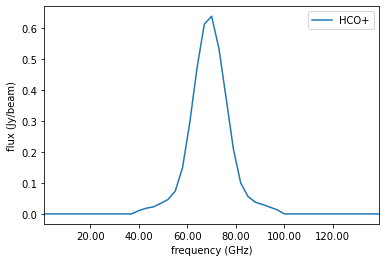

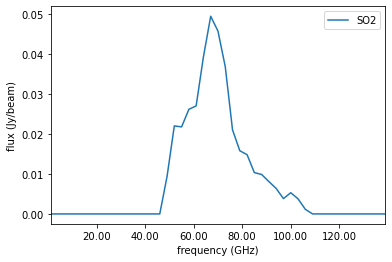

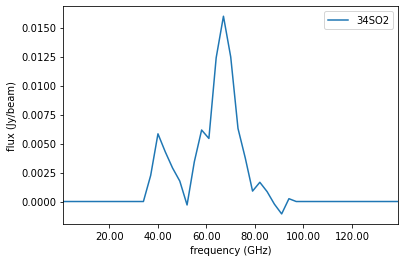

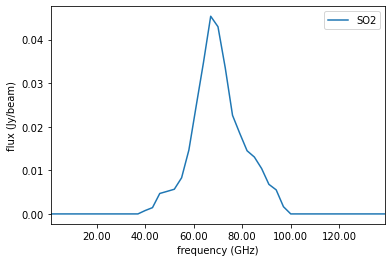

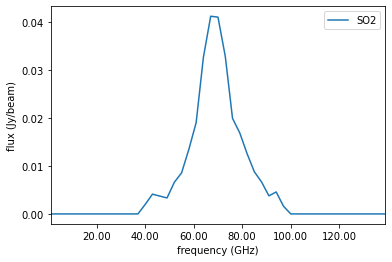

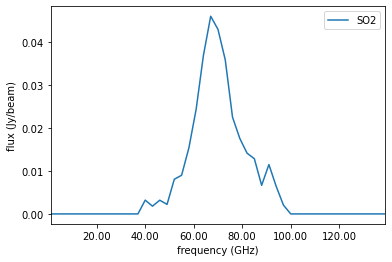

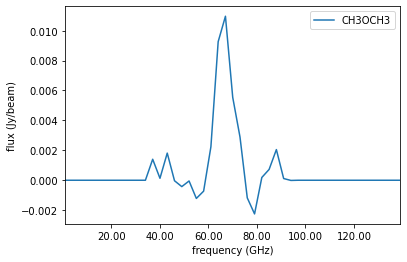

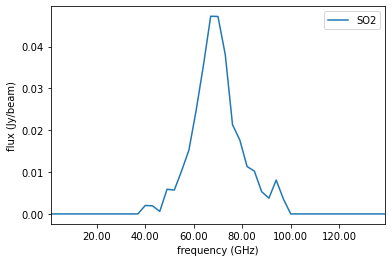

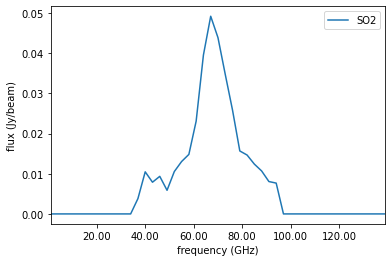

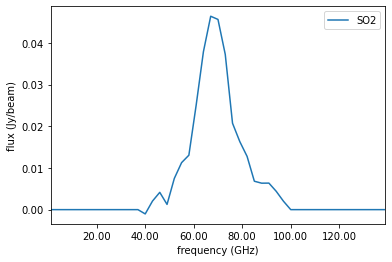

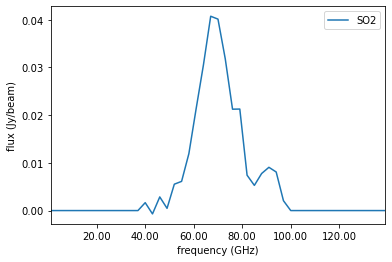

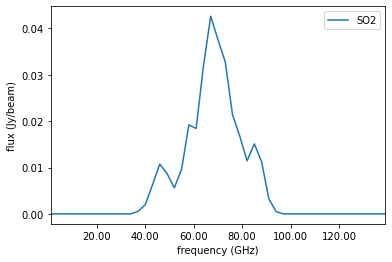

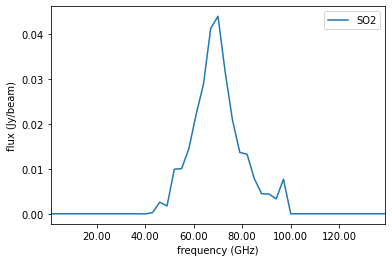

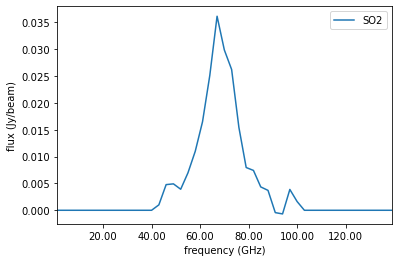

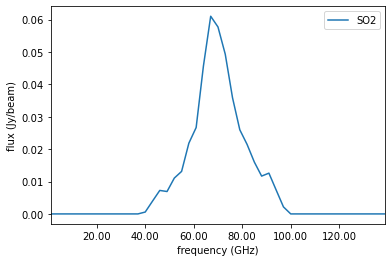

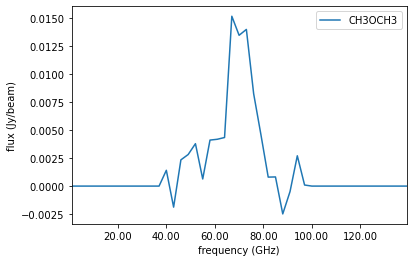

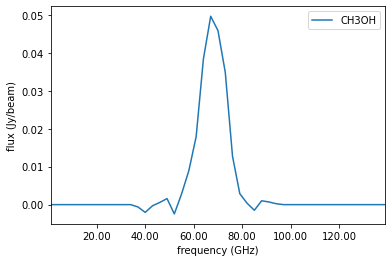

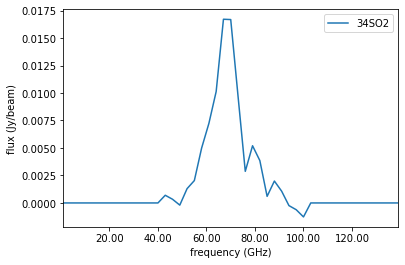

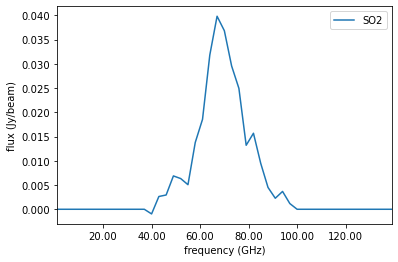

In [11]:
# 删掉识别不出的线和太密集的线
# 对齐速度
c=299792458

# name=['SO','CO','SO','HCO+','SO2']
# rest_fre=[344.31061200,345.79598990,346.52848100,356.73422300,358.21564000]

name_spw0=["HC15N","34SO2","SO","CH3OCH3","CH3OH","CH3OCH3","34SO2","34SO2","t-HCOOH"]
name_spw1=["SO2","CO"]
name_spw2=["CH3OH","SO","SO2","t-HCOOH","H13CO+","SiO"]
name_spw3=["HCO+","SO2","34SO2","SO2","SO2","SO2","CH3OCH3","SO2","SO2","SO2","SO2","SO2","SO2","SO2","SO2"]
name_spw4=["CH3OCH3","CH3OH","34SO2","SO2"]
name=[name_spw0,name_spw1,name_spw2,name_spw3,name_spw4]

spw0_peak=[344.19997631,344.24591399,344.31042249,344.35733694,344.44188244,344.51030006,344.57969546,344.80596309,345.03076456]
rest_fre0=[344.2003199, 344.2453476, 344.310612, 344.3580659, 344.443433, 344.5153801, 344.581045, 344.8079157,345.030561]

spw1_peak=[345.33849123,345.79395884]
rest_fre1=[345.3385391,345.7959899]

spw2_peak=[346.20164832,346.52858732,346.65173964,346.71624814,346.99822725,347.33054255]
rest_fre2=[346.202719,346.528481,346.6521672, 346.718858,  346.998344,347.330631]

spw3_peak=[356.73359532,356.75998539,357.10011993,357.16462743,357.2403759,357.38649655,357.45784651,357.58099883,357.67043123,357.89132257,357.92504249,357.96120636,358.01300872,358.03939879,358.21484185]
rest_fre3=[356.734223, 356.7551893, 357.1021822, 357.16536, 357.24119, 357.38757, 357.4602017, 357.5814483, 357.67178, 357.892442, 357.92596, 357.96289, 358.01309, 358.03808,358.21564]

spw4_peak=[358.45089029,358.6043418,358.98845945,359.76988829]
rest_fre4=[358.4519426, 358.605799, 358.9879745,359.7706815]

peak=[spw0_peak,spw1_peak,spw2_peak,spw3_peak,spw4_peak]
rest_fre=[rest_fre0,rest_fre1,rest_fre2,rest_fre3,rest_fre4]


x=[]
y=[]
data_flux=[]
#plt.figure(figsize=(10,6))
for i in range(len(data)):   #len(data)
    data_x,data_y=data_to_xy(data[i])   # 一个spw文件的所有x,y数据
    #for n in range(len(name)):    # 循环每一个spw
    x_large,y_large=enlarge2(peak[i],data_x,data_y)      # 一个光谱文件中，把所有的谱线挑出来，放在一个列表里 x_large=[[x,x,x,x],[x,x,x,x,x]]

    for j in range(len(x_large)):    # 循环一个spw的每一个峰len(x_large)
        list_x=[]
        list_y=[]

        for k in range(len(x_large[j])):            # 把某一个峰的列表数据取出来 peak1=x_large[i]=[x,x,x,x,x,x]
            list_x.append((c*(x_large[j][k]-rest_fre[i][j])/rest_fre[i][j])/1000)
#             list_x.append((c*(x_large[k]-rest_fre[j])/rest_fre[j])/1000+239.5)   # 将频率转换为速度，并加上视向速度
            list_y.append(y_large[j][k])
        

        copied_list_x = copy.deepcopy(list_x)
        y_flux=duiqi_v(copied_list_x,list_y)
        this_x=list(range(0,len(y_flux)))
        list_x_new,y_flux_new=hebin(this_x,y_flux)
        data_flux.append(y_flux_new)
        plt.plot(list_x_new,y_flux_new,label=name[i][j])
#        plt.plot(list_x,y_flux,label=name[i][j])
        
        plt.xlim(list_x_new[0]-0.02,list_x_new[-1]+0.02)
        ax = plt.gca()  # 获取当前轴
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

        plt.xlabel("frequency (GHz)")
        plt.ylabel("flux (Jy/beam)")

        x.append(list_x)
        y.append(list_y)
        
        

        plt.legend()
        plt.show()

D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\conda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
D:\conda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<class 'numpy.ndarray'>


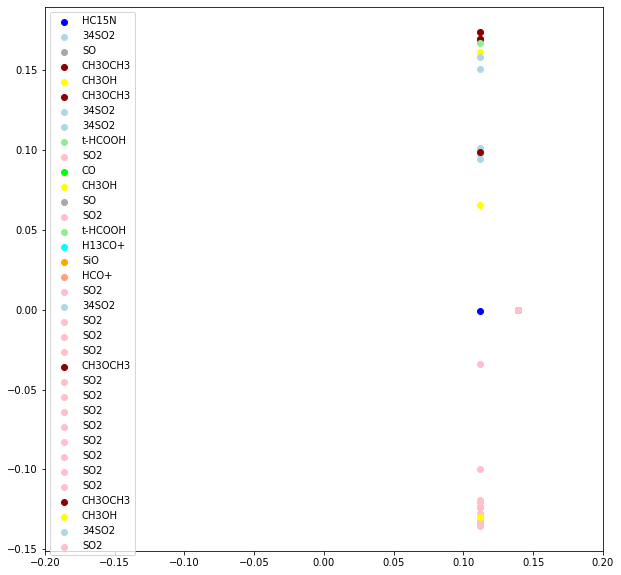

In [16]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE,MDS, Isomap,LocallyLinearEmbedding,SpectralEmbedding

 
tsne=TSNE(random_state=42)
mds=MDS(n_components=2)
#iso=Isomap(n_components=2,n_neighbors=30)
#local=LocallyLinearEmbedding(n_components=2)
spec=SpectralEmbedding(n_components=2)
 
digits_tsne=tsne.fit_transform(data_flux)
digits_mds=mds.fit_transform(data_flux)
# digits_iso=iso.fit_transform(data_flux)
# digits_local=local.fit_transform(data_flux)
digits_spec=spec.fit_transform(data_flux)
# print(digits_tsne)
# colors=['#476A2A','#7851B8','#BD3430','#4A2D4E','#875525',
#         '#A83683','#4E655E','#853541','#3A3120','#535D8E']

color_map = {'33SO2':'#000000', '13CH3OH???':'#FF0000', 'CO':'#00FF00', 'HC15N':'#0000FF', 'CH3OH':'#FFFF00','H13CO+':'#00FFFF','SO+':'#FF00FF','SiO':'#FFA500', 'SO2':'#FFC0CB', 'HCO+':'#FFA07A', 'SO':'#A9A9A9', 'CH3OCH3':'#8B0000', '34SO2':'#ADD8E6', 't-HCOOH':'#90EE90', 'SO2_v2=1???':'#D8BFD8'}
 
# plt.figure(figsize=(10,10))
# plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
# plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)

new_name = np.concatenate(name).tolist()
title=list(range(0,0+1*42,1))

# for i in range(len(digits_tsne)):
#     plt.scatter(digits_tsne[i, 0], digits_tsne[i, 1], color=color_map[new_name[i]], label=new_name[i])

# plt.legend()
# plt.xlabel('t-SNE feature 0')
# plt.ylabel('t-SNE feature 1')
# plt.show()

# # MDS
# plt.figure(figsize=(10,10))
# # plt.xlim(digits_mds[:,0].min(),digits_mds[:,0].max()+1)
# # plt.ylim(digits_mds[:,1].min(),digits_mds[:,1].max()+1)
# for i in range(len(digits_mds)):
# #     plt.text(digits_mds[i,0],digits_mds[i,1],str(new_name[i]),
# #              color=colors[i],
# #              fontdict={'weight':'bold','size':15})
#     plt.scatter(digits_mds[i, 0], digits_mds[i, 1], color=color_map[new_name[i]], label=new_name[i])
# # plt.ylim(-1,1)
# # plt.xlim(-1,1)
# plt.legend()
# plt.show()

# SpectralEmbedding
plt.figure(figsize=(10,10))
# plt.xlim(digits_spec[:,0].min(),digits_spec[:,0].max()+1)
# plt.ylim(digits_spec[:,1].min(),digits_spec[:,1].max()+1)
plt.xlim(-0.2,0.2)
for i in range(len(digits_spec)):
#     plt.text(digits_spec[i,0],digits_spec[i,1],str(new_name[i]),
#              color=colors[i],
#              fontdict={'weight':'bold','size':15})
    plt.scatter(digits_spec[i, 0], digits_spec[i, 1], color=color_map[new_name[i]], label=new_name[i])
print(type(digits_spec))
plt.legend()
plt.show()

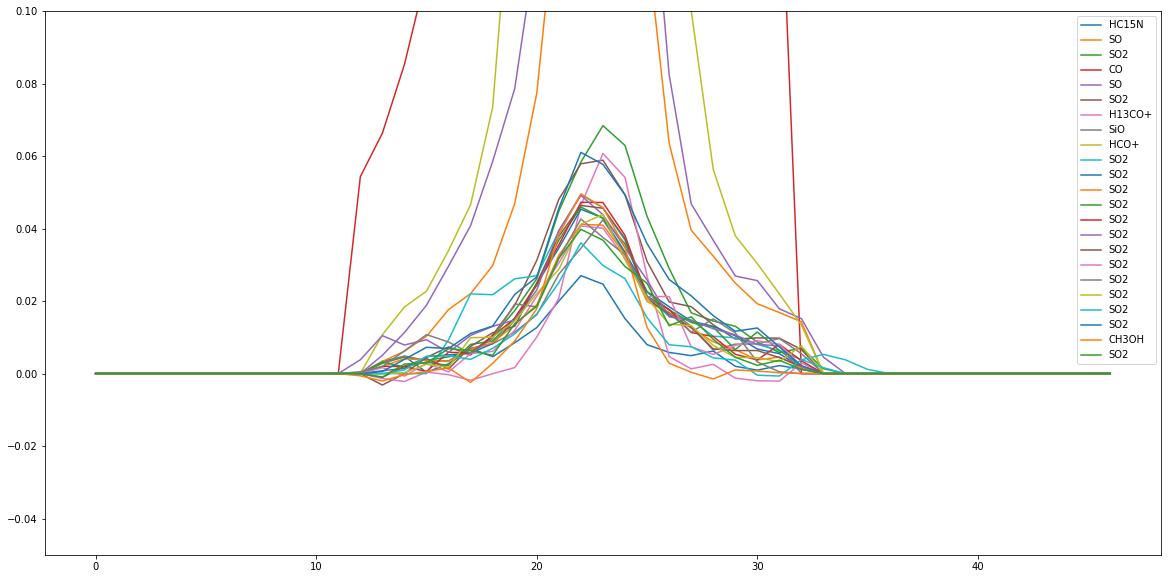

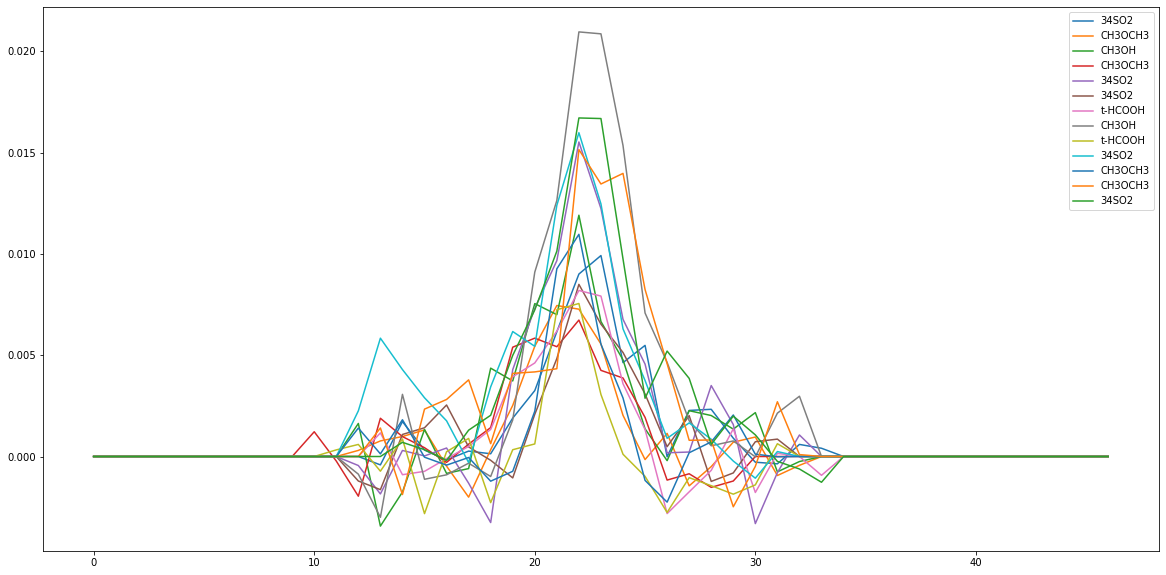

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


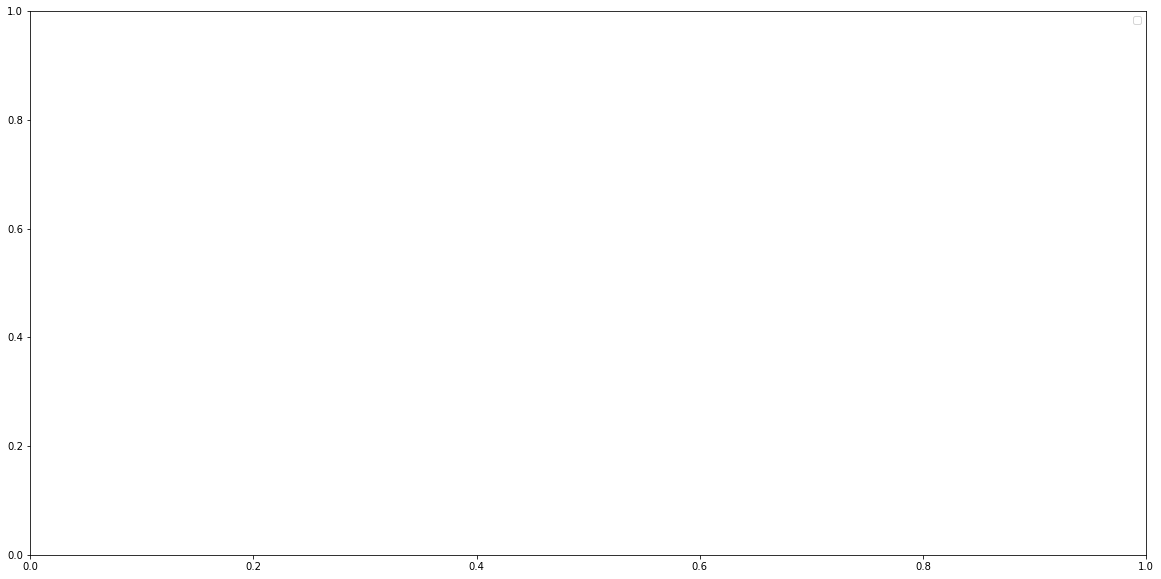

In [18]:
#print(digits_spec)
cate1=[]
name1=[]
cate2=[]
name2=[]
cate3=[]
name3=[]
for i in range(len(digits_spec)):
    if digits_spec[i,0]>0.0 and digits_spec[i,1]<0:
        cate1.append(data_flux[i])
        name1.append(new_name[i])
    elif digits_spec[i,0]>0.0 and digits_spec[i,1]>0:
        cate2.append(data_flux[i])
        name2.append(new_name[i])
#     elif digits_spec[i,0]<0.0 and digits_spec[i,1]<0.05:
#         cate3.append(data_flux[i])
#         name3.append(new_name[i])

plt.figure(figsize=(20,10))
for i in range(len(cate1)):
    plt.plot(cate1[i],label=name1[i])

plt.ylim(-0.05,0.1)
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(cate2)):
    plt.plot(cate2[i],label=name2[i])

#plt.xlim(25,150)
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
for i in range(len(cate3)):
    plt.plot(cate3[i],label=name3[i])

#plt.xlim(25,150)
plt.legend()
plt.show()